Import and clean the file

In [1]:
%matplotlib inline
import numpy as np
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import requests
import descartes
import calendar
import seaborn as sns
import matplotlib
# Loading data (https://www.nti.org/analysis/articles/cns-north-korea-missile-test-database/). Encoding problem solved with 'unicode_escape'.
df = pd.read_csv('../data/north_korea_missile_test_database.csv', encoding= 'unicode_escape', index_col= "F1")
# Dropping unused columns.
df = df.drop(columns=['Launch Agency/Authority', 'Other Name', 'Additional Information', 'Source(s)', 'Launch Time (UTC)', 'Date Entered/Updated', 'Apogee'])
# Changing formats (str to int or float)
df['Distance Travelled'] = df['Distance Travelled'].apply(lambda x: x.replace('km', '') if isinstance(x, str) else x)
# And then, convert 'Unkown' values to numerics.
df['Distance Travelled'] = df['Distance Travelled'].replace('Unknown', 'NaN') 
# Finally, I can change it to numeric pandas table.
df['Distance Travelled'] = pd.to_numeric(df['Distance Travelled'], errors='coerce').fillna(0)
df['Landing Location'] = df['Landing Location'].apply(lambda x: x.replace('330km east of Hachinohe and 4000 km out into Pacific Ocean', '330km east of Hachinohe') if isinstance(x, str) else x)
# Changing 'location' data
df['Facility Latitude'] = pd.to_numeric(df['Facility Latitude'], errors='coerce')
df['Facility Longitude'] = pd.to_numeric(df['Facility Longitude'], errors='coerce')
# Date changes
df['Date'] = pd.to_datetime(df['Date'])
# Creating a new column for separating the year values in numeric format.
df['Year'] = df['Date'].dt.year
# Another column for changing number values to string values.
df['Month_Number'] = df['Date'].dt.month
# Another column for separating values to month specifically.
df['Month'] = df['Month_Number'].apply(lambda x: calendar.month_abbr[x])
# Another column for counting test numbers.
df["# of Test"] = 1
# Simplifying the Year/Month format.
df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

Number of missile tests by timeline (part 1. Essential portion)

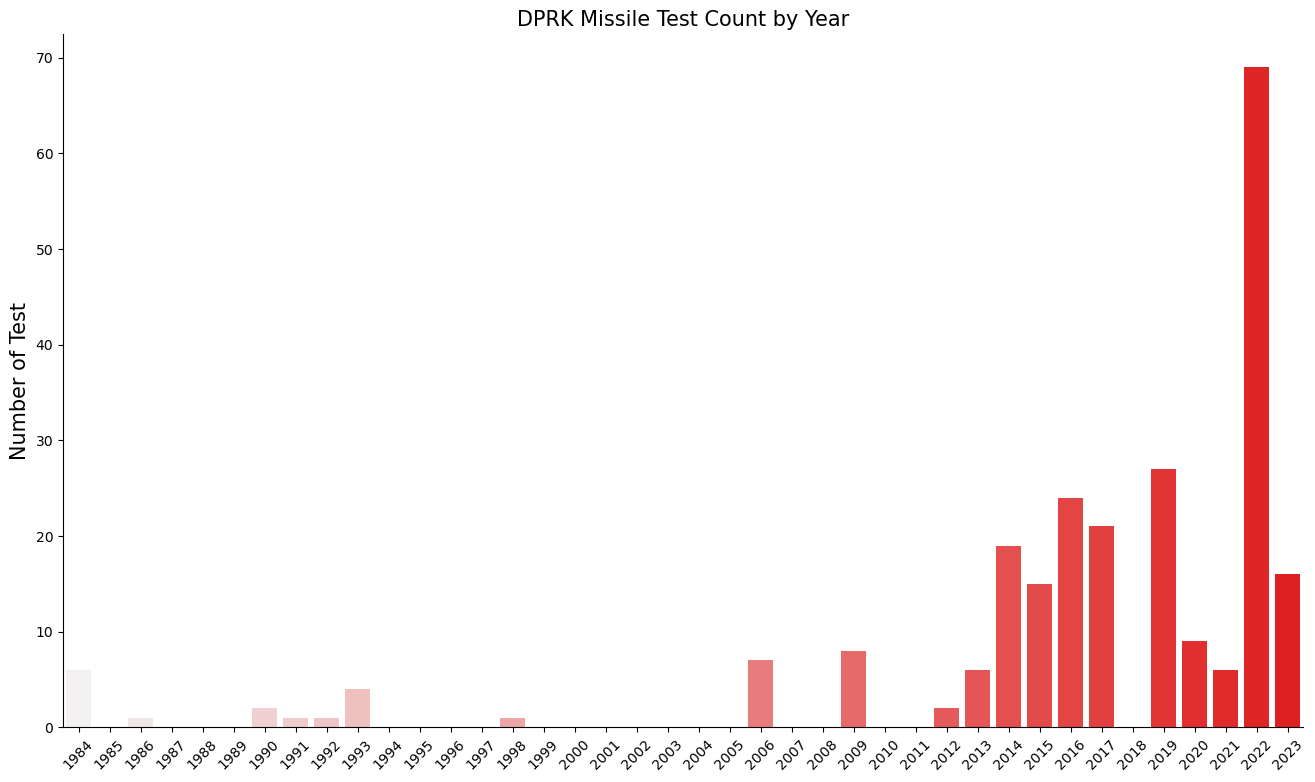

In [2]:
# Making a chart that counts the total missile test by year
grouped_total_num = df.groupby('Year').sum(numeric_only=True).reset_index()
# Create a range of years from the minimum to maximum years in the data
year_chart = range(df['Year'].min(), df['Year'].max() + 1)
# Create a DataFrame with listing all years
year_chart_df = pd.DataFrame({'Year': year_chart})
# Merge the year_chart_df with the grouped DataFrame to fill missing years with 0 test counts
merged_df = pd.merge(year_chart_df, grouped_total_num, how='left', on='Year')
merged_df['# of Test'] = merged_df['# of Test'].fillna(0)
# Create a gradient color palette using seaborn's dark_palette()
n_colors = len(merged_df)  
# Number of colors in the palette (one for each year)
gradient_palette = sns.dark_palette("red", n_colors=n_colors)
# Create the bar chart with the gradient color palette
plt.figure(figsize=(16, 9))
sns.barplot(x='Year', y='# of Test', data=merged_df, palette=gradient_palette)
# Customize the plot
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.xticks(rotation=45)

# Set x-axis label and title
plt.xlabel(xlabel=None, fontsize=15)
plt.ylabel('Number of Test', fontsize=15)
plt.title('DPRK Missile Test Count by Year', fontsize=15)
plt.show()

Number of missile tests by timeline (part 2. Additional comments - non essential)

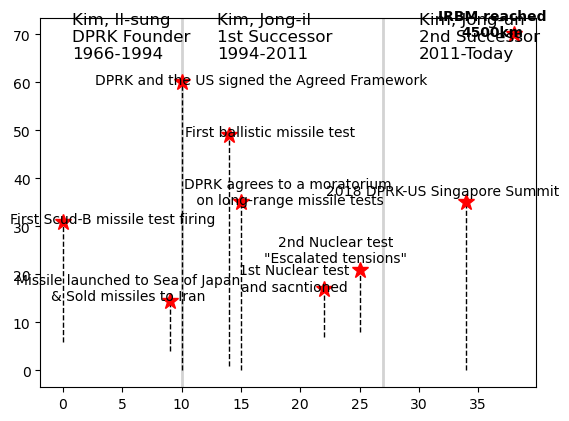

In [9]:
# The following lines are not essential to plot a graph

# Give the vertical lines to seprate regimes 
plt.axvline(10, 0, 15, color='lightgray', linestyle='-', linewidth='2')
plt.axvline(27, 0, 15, color='lightgray', linestyle='-', linewidth='2')
# Kim Il-sung
image1 = plt.imread('../img/kis.jpg')
image_position1 = (200, 1340) 
plt.figimage(image1, image_position1[0], image_position1[1], alpha=1, zorder=10)
# Kim Jung-il
image2 = plt.imread('../img/kji.jpg')
image_position2 = (900, 1340) 
plt.figimage(image2, image_position2[0], image_position2[1], alpha=1, zorder=10)
# Kim Jong-un
image3 = plt.imread('../img/kju.jpg')
image_position3 = (1850, 1340) 
plt.figimage(image3, image_position3[0], image_position3[1], alpha=1, zorder=10)
# Add comments next to each pictures
plt.text(0.8, 65,'Kim, Il-sung\nDPRK Founder\n1966-1994', fontsize=12, color='black')
plt.text(13, 65, 'Kim, Jong-il\n1st Successor\n1994-2011', fontsize=12, color='black')
plt.text(30, 65, 'Kim, Jong-un\n2nd Successor\n2011-Today', fontsize=12, color='black')
# First comment & line descriptions
x1 = 0
y1 = merged_df.loc[0, '# of Test']
comment1 = 'First Scud-B missile test firing'
line_length1 = 24.5  
plt.text(x1 + 4.2, y1 + 24, comment1, ha='center', va='bottom')
plt.plot([x1, x1], [y1, y1 + line_length1], color='black', linewidth=1, linestyle='--')
# First star
star_x1 = x1
star_y1 = y1 + 25  # Adjust the vertical position of the star
plt.plot(star_x1, star_y1, marker='*', color='red', markersize=12)
# Second comment & line descriptions
x2 = 9
y2 = merged_df.loc[9, '# of Test']
comment2 = 'Missile launched to Sea of Japan\n& Sold missiles to Iran'
line_length2 = 10
plt.text(x2 - 3.5, y2 + 10, comment2, ha='center', va='bottom')
plt.plot([x2, x2], [y2, y2 + line_length2], color='black', linewidth=1, linestyle='--')
line_length2 = 24.5  # Extend the line by 5 points
# Second star
star_x2 = x2
star_y2 = y2 + 10.5  # Adjust the vertical position of the star
plt.plot(star_x2, star_y2, marker='*', color='red', markersize=12)
# Third comment & line descriptions
x3 = 10
y3 = merged_df.loc[10, '# of Test']
comment3 = 'DPRK and the US signed the Agreed Framework'
line_length3 = 60
plt.text(x3 + 6.7, y3 + 59, comment3, ha='center', va='bottom')
plt.plot([x3, x3], [y3, y3 + line_length3], color='black', linewidth=1, linestyle='--')
# Third star
star_x3 = x3
star_y3 = y3 + 60  # Adjust the vertical position of the star
plt.plot(star_x3, star_y3, marker='*', color='red', markersize=12)
# Forth comment & line descriptions
x4 = 14
y4 = merged_df.loc[14, '# of Test']
comment4 = 'First ballistic missile test'
line_length4 = 48
plt.text(x4 + 3.5, y4 + 47.3, comment4, ha='center', va='bottom')
plt.plot([x4, x4], [y4, y4 + line_length4], color='black', linewidth=1, linestyle='--')
line_length4 = 48.5  # Extend the line by 5 points
# Fourth star
star_x4 = x4
star_y4 = y4 + 48  # Adjust the vertical position of the star
plt.plot(star_x4, star_y4, marker='*', color='red', markersize=12)
# Fifth comment & line descriptions
x5 = 15
y5 = merged_df.loc[15, '# of Test']
comment5 = 'DPRK agrees to a moratorium\n on long-range missile tests'
line_length5 = 35
plt.text(x5 + 4, y5 + 34, comment5, ha='center', va='bottom')
plt.plot([x5, x5], [y5, y5 + line_length5], color='black', linewidth=1, linestyle='--')
# Fifth star
star_x5 = x5
star_y5 = y5 + 35  # Adjust the vertical position of the star
plt.plot(star_x5, star_y5, marker='*', color='red', markersize=12)
# Sixth comment & line descriptions
x6 = 34
y6 = merged_df.loc[34, '# of Test']
comment6 = '2018 DPRK-US Singapore Summit'
line_length6 = 35
plt.text(x6 - 2, y6 + 36, comment6, ha='center', va='bottom')
plt.plot([x6, x6], [y6, y6 + line_length6], color='black', linewidth=1, linestyle='--')
# Sixth star
star_x6 = x6
star_y6 = y6 + 35  # Adjust the vertical position of the star
plt.plot(star_x6, star_y6, marker='*', color='red', markersize=12)
# Seventh comment & line descriptions
x7 = 38
y7 = merged_df.loc[38, '# of Test']
comment7 = 'IRBM reached\n4500km'
line_length7 = 30
plt.text(x7 - 1.8, y7 + 0, comment7, ha='center', va='bottom', weight ='bold')
# Seventh star
star_x7 = x7
star_y7 = y7 + 1  # Adjust the vertical position of the star
plt.plot(star_x7, star_y7, marker='*', color='red', markersize=12)
# Eight comment & line descriptions
x8 = 22
y8 = merged_df.loc[22, '# of Test']
comment8 = '1st Nuclear test\nand sacntioned'
line_length8 = 9
plt.text(x8 - 2.5, y8 + 9, comment8, ha='center', va='bottom')
plt.plot([x8, x8], [y8, y8 + line_length8], color='black', linewidth=1, linestyle='--')
# Eight star
star_x8 = x8
star_y8 = y8 + 10  # Adjust the vertical position of the star
plt.plot(star_x8, star_y8, marker='*', color='red', markersize=12)
# Nineth comment & line descriptions
x9 = 25
y9 = merged_df.loc[25, '# of Test']
comment9 = '2nd Nuclear test\n"Escalated tensions"'
line_length9 = 14
plt.text(x9 - 2, y9 + 14, comment9, ha='center', va='bottom')
plt.plot([x9, x9], [y9, y9 + line_length9], color='black', linewidth=1, linestyle='--')
# Nineth star
star_x9 = x9
star_y9 = y9 + 13  # Adjust the vertical position of the star
plt.plot(star_x9, star_y9, marker='*', color='red', markersize=12)
# Display the bar chart
plt.show()

# However, it makes a graph with robust information when combined with the above lines of code
